In [20]:
import pandas as pd
import json
from collections import Counter
import matplotlib.pyplot as plt
from google.colab import files

# Upload files
print("Please upload the CSV file for edges.")
edges_file = files.upload()
print("Please upload the JSON file for genres.")
genres_file = files.upload()

# Load data
edges = pd.read_csv(next(iter(edges_file.keys())))
with open(next(iter(genres_file.keys())), 'r') as f:
    genres = json.load(f)

Please upload the CSV file for edges.


Saving node_data_RO_v2.csv to node_data_RO_v2.csv
Please upload the JSON file for genres.


Saving RO_genres.json to RO_genres (3).json


Most central genres in community 14: [('Pop', 5041), ('Dance', 3360), ('Rap/Hip Hop', 3038), ('Rock', 2811), ('Electro', 2488), ('Alternative', 2329), ('R&B', 1860), ('International Pop', 1481), ('Techno/House', 1331), ('Indie Rock', 1282)]


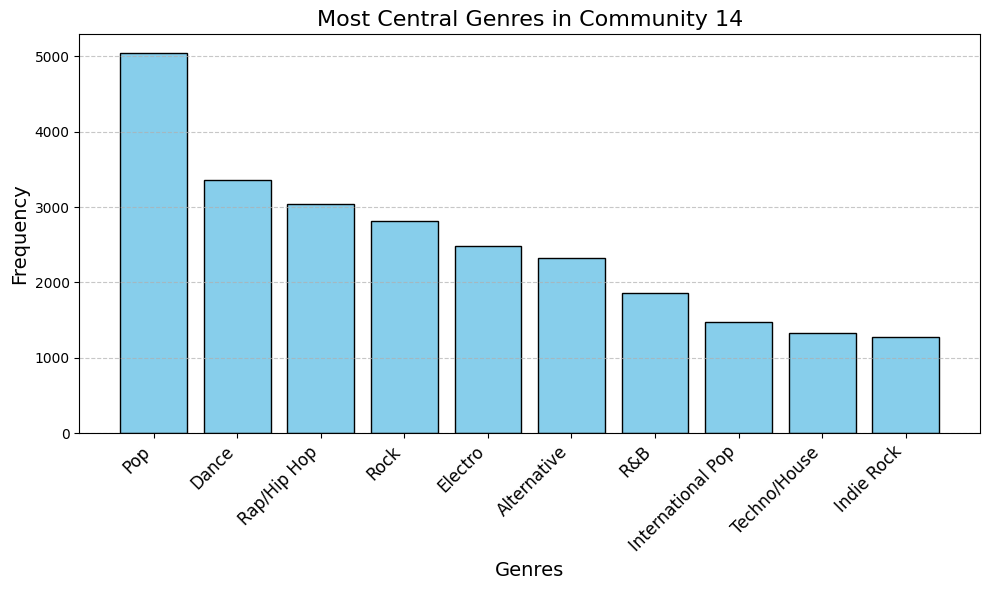

In [21]:
# Question 1: Most Central Musical Genres (Community-Specific)

user_genre_counts = Counter()
for genres_list in edges['genres']:
    genre_list = eval(genres_list)
    user_genre_counts.update(genre_list)

# identify community-specific genres
community_genres = {}
for community in edges['community_id'].unique():
    community_nodes = edges[edges['community_id'] == community]
    community_genres[community] = Counter()
    for genres_list in community_nodes['genres']:
        genre_list = eval(genres_list)
        community_genres[community].update(genre_list)

largest_community = max(community_genres, key=lambda x: sum(community_genres[x].values()))
most_central_genres = community_genres[largest_community].most_common(10)
print(f"Most central genres in community {largest_community}:", most_central_genres)

genres_list, counts = zip(*most_central_genres)
plt.figure(figsize=(10, 6))
plt.bar(genres_list, counts, color='skyblue', edgecolor='black')
plt.title(f"Most Central Genres in Community {largest_community}", fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.xlabel("Genres", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



This chart highlights the genres most frequently liked within the largest community. It emphasizes the preferences unique to specific groups, showing intra-community trends

Genres bridging communities: [('Pop', 1431), ('Rock', 1431), ('Alternative', 1378), ('Rap/Hip Hop', 1326), ('Electro', 1326), ('Dance', 1326), ('Techno/House', 1275), ('International Pop', 1275), ('R&B', 1275), ('Contemporary R&B', 1176)]


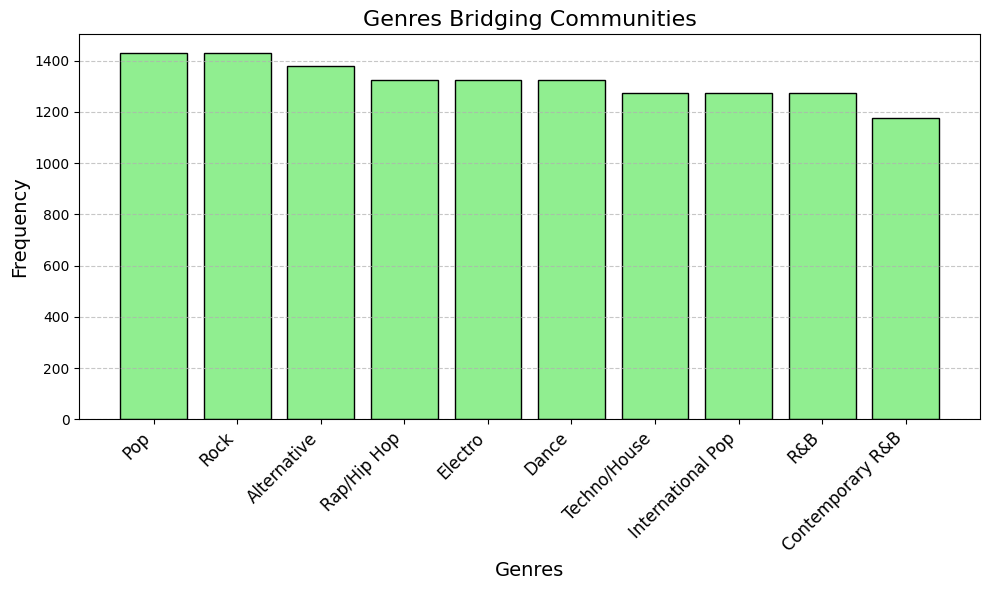

In [26]:
# Question 2: Genres Shared Across Communities (Community Bridging)

# precompute genres for each community
community_genres = {}
for community_id in edges['community_id'].unique():
    genres_in_community = edges[edges['community_id'] == community_id]['genres']
    community_genres[community_id] = set(
        genre for genres_list in genres_in_community for genre in eval(genres_list)
    )

# compare genres between communities
shared_genres = Counter()
unique_communities = edges['community_id'].unique()
for i, community_a in enumerate(unique_communities):
    for community_b in unique_communities[i + 1:]:
        common_genres = community_genres[community_a] & community_genres[community_b]
        for genre in common_genres:
            shared_genres[genre] += 1

shared_genres_top = shared_genres.most_common(10)
print("Genres bridging communities:", shared_genres_top)

genres_list, counts = zip(*shared_genres_top)
plt.figure(figsize=(10, 6))
plt.bar(genres_list, counts, color='lightgreen', edgecolor='black')
plt.title("Genres Bridging Communities", fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.xlabel("Genres", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


This chart visualizes the genres that bridge distinct communities within the network. It identifies musical preferences that connect disparate groups, enhancing cultural cohesion.

Genres influenced by high-degree users: [('Pop', 9), ('Rock', 7), ('Alternative', 6), ('R&B', 6), ('Dance', 5), ('Rap/Hip Hop', 5), ('Electro', 4), ('Contemporary R&B', 3), ('Techno/House', 3), ('International Pop', 3)]


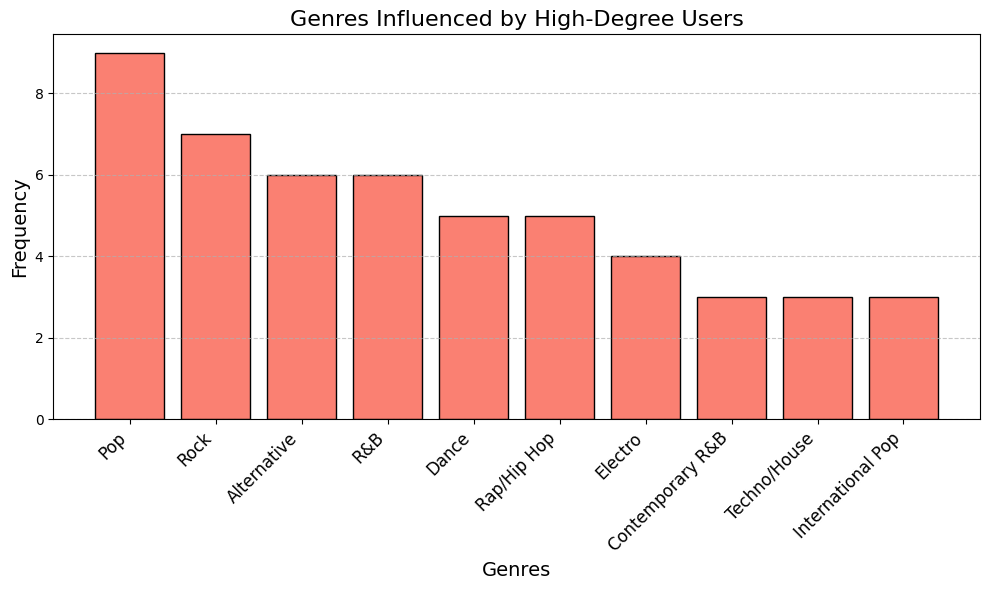

In [24]:
# Question 4: Influence of High-Degree Users (Network-Wide Spread)

high_degree_users = edges.sort_values(by='degree_centrality', ascending=False).head(10)
high_degree_genres = Counter()

# simulate genre influence
for _, row in high_degree_users.iterrows():
    user_genres = eval(row['genres'])
    high_degree_genres.update(user_genres)

influenced_genres = high_degree_genres.most_common(10)
print("Genres influenced by high-degree users:", influenced_genres)

genres_list, counts = zip(*influenced_genres)
plt.figure(figsize=(10, 6))
plt.bar(genres_list, counts, color='salmon', edgecolor='black')
plt.title("Genres Influenced by High-Degree Users", fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.xlabel("Genres", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()





High-degree users exhibit a significant role in genre propagation. This visualization quantifies their influence by assessing how often genres overlap with their connected users' preferences.

Most diverse users: [(8748, 42), (30085, 42), (33736, 40), (537, 40), (40601, 40), (33651, 39), (31690, 38), (11356, 38), (28676, 37), (15392, 37)]
Genres promoted by diverse users: [('Indie Rock/Rock pop', 10), ('Indie Pop/Folk', 10), ('International Pop', 10), ('Rap/Hip Hop', 10), ('Film Scores', 10), ('Electro', 10), ('Indie Rock', 10), ('Techno/House', 10), ('R&B', 10), ('Singer & Songwriter', 10)]
Communities bridged by diverse users: {8748: {0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53}, 30085: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53}, 33736: {0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34

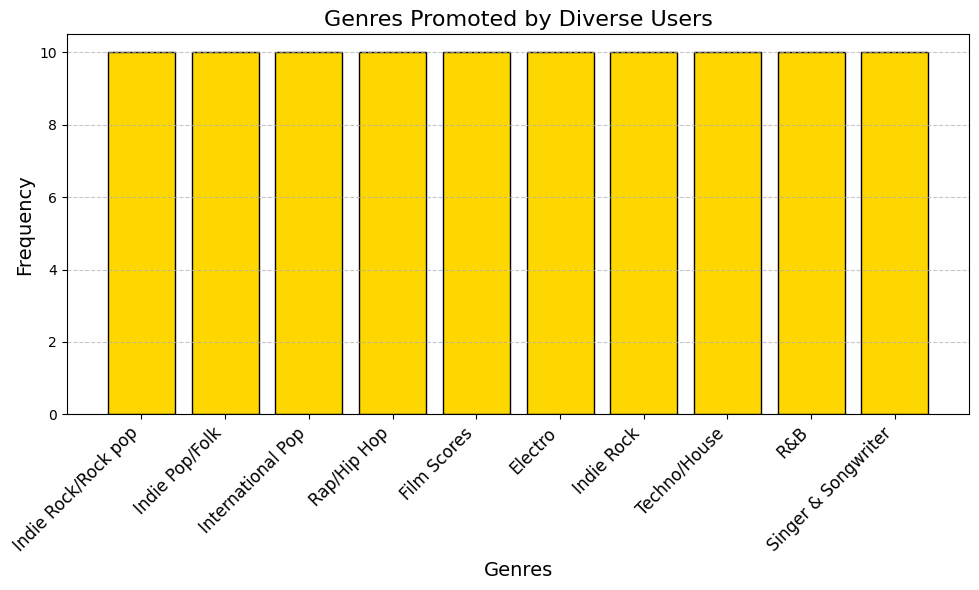

In [25]:
# Question 5: Influence of Diverse Users (Bridging Communities)

user_diversity = {row['node_id']: len(set(eval(row['genres']))) for _, row in edges.iterrows()}
most_diverse_users = sorted(user_diversity.items(), key=lambda x: x[1], reverse=True)[:10]
print("Most diverse users:", most_diverse_users)

diverse_genres = Counter()
bridging_communities = {}

# analyze community bridging for diverse users
for user_id, diversity in most_diverse_users:
    user_row = edges[edges['node_id'] == user_id].iloc[0]
    user_genres = eval(user_row['genres'])
    user_community = user_row['community_id']

    connected_communities = edges[edges['community_id'] != user_community]
    for _, connected_row in connected_communities.iterrows():
        connected_genres = eval(connected_row['genres'])
        if set(user_genres) & set(connected_genres):
            if user_id not in bridging_communities:
                bridging_communities[user_id] = set()
            bridging_communities[user_id].add(connected_row['community_id'])

    diverse_genres.update(user_genres)

diverse_genres_top = diverse_genres.most_common(10)
print("Genres promoted by diverse users:", diverse_genres_top)
print("Communities bridged by diverse users:", bridging_communities)

genres_list, counts = zip(*diverse_genres_top)
plt.figure(figsize=(10, 6))
plt.bar(genres_list, counts, color='gold', edgecolor='black')
plt.title("Genres Promoted by Diverse Users", fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.xlabel("Genres", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()





Diverse users promote a variety of genres across the network, fostering rich interconnections between communities. This analysis highlights their unique role in bridging cultural or musical gaps within the user base.